<a href="https://colab.research.google.com/github/paamchikjoy/SMART.V/blob/main/Traffic_Signals_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
!nvidia-smi

Thu Sep 19 14:38:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Home = "/content"
print(Home)

/content


In [ ]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=9bc116d8f53262dd769cdbc54da30fce97f977f29fbb83335e23729e2d32ce1f
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [ ]:
!mkdir {Home}/datasets

In [ ]:
%cd {Home}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="V1vd0Cn6sE6sANvAgAQk")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-signs-2 in yolov5pytorch:: 100%|██████████| 4198/4198 [00:00<00:00, 4608.90it/s]


In [ ]:
%cd {Home}
!yolo task=detect mode=train model=yolov8s.pt data="/content/datasets/road_signs/data.yaml" epochs=30 imgsz=640

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:341: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(attempt_download(weight), map_l

In [ ]:
!ls {Home}/runs/detect/train4

args.yaml					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1725010845.7ffbec0b3695.7759.0  train_batch0.jpg	 val_batch1_labels.jpg
F1_curve.png					    train_batch1720.jpg  val_batch1_pred.jpg
P_curve.png					    train_batch1721.jpg  val_batch2_labels.jpg
PR_curve.png					    train_batch1722.jpg  val_batch2_pred.jpg
predictions.json				    train_batch1.jpg	 weights
R_curve.png					    train_batch2.jpg


In [ ]:
from IPython.display import Image

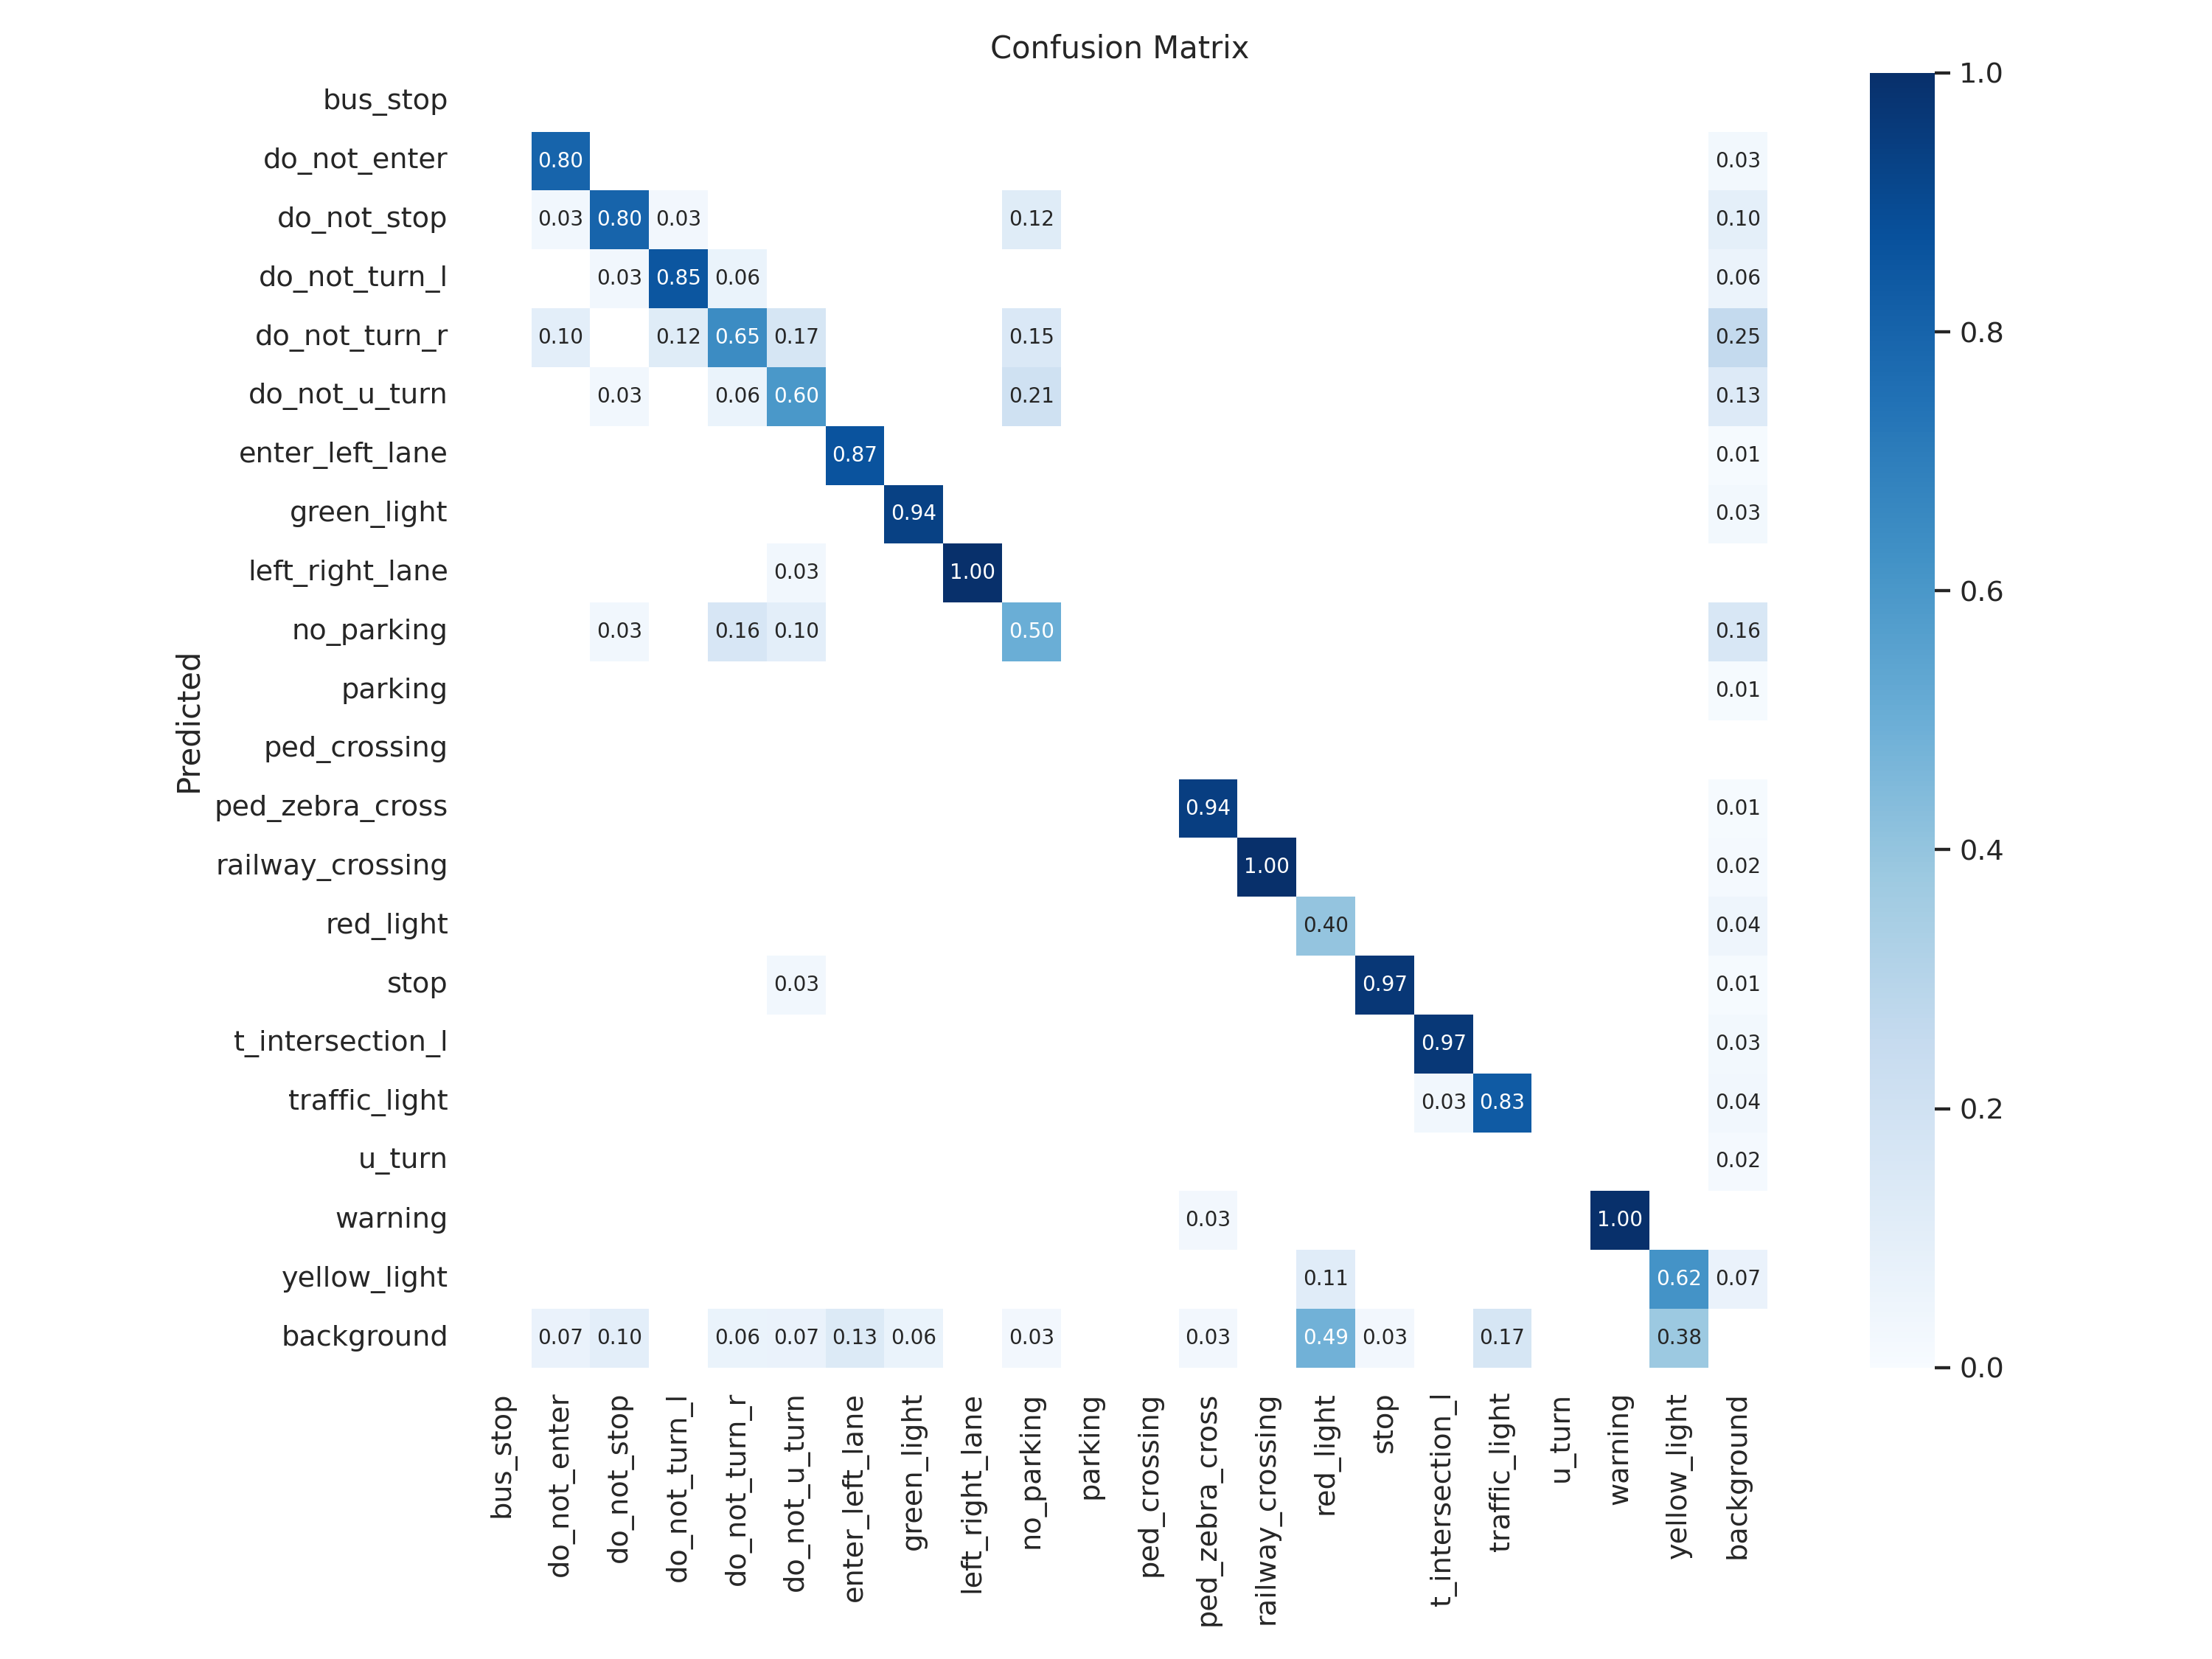

In [ ]:
Image(filename=f'{Home}/runs/detect/train4/confusion_matrix.png')

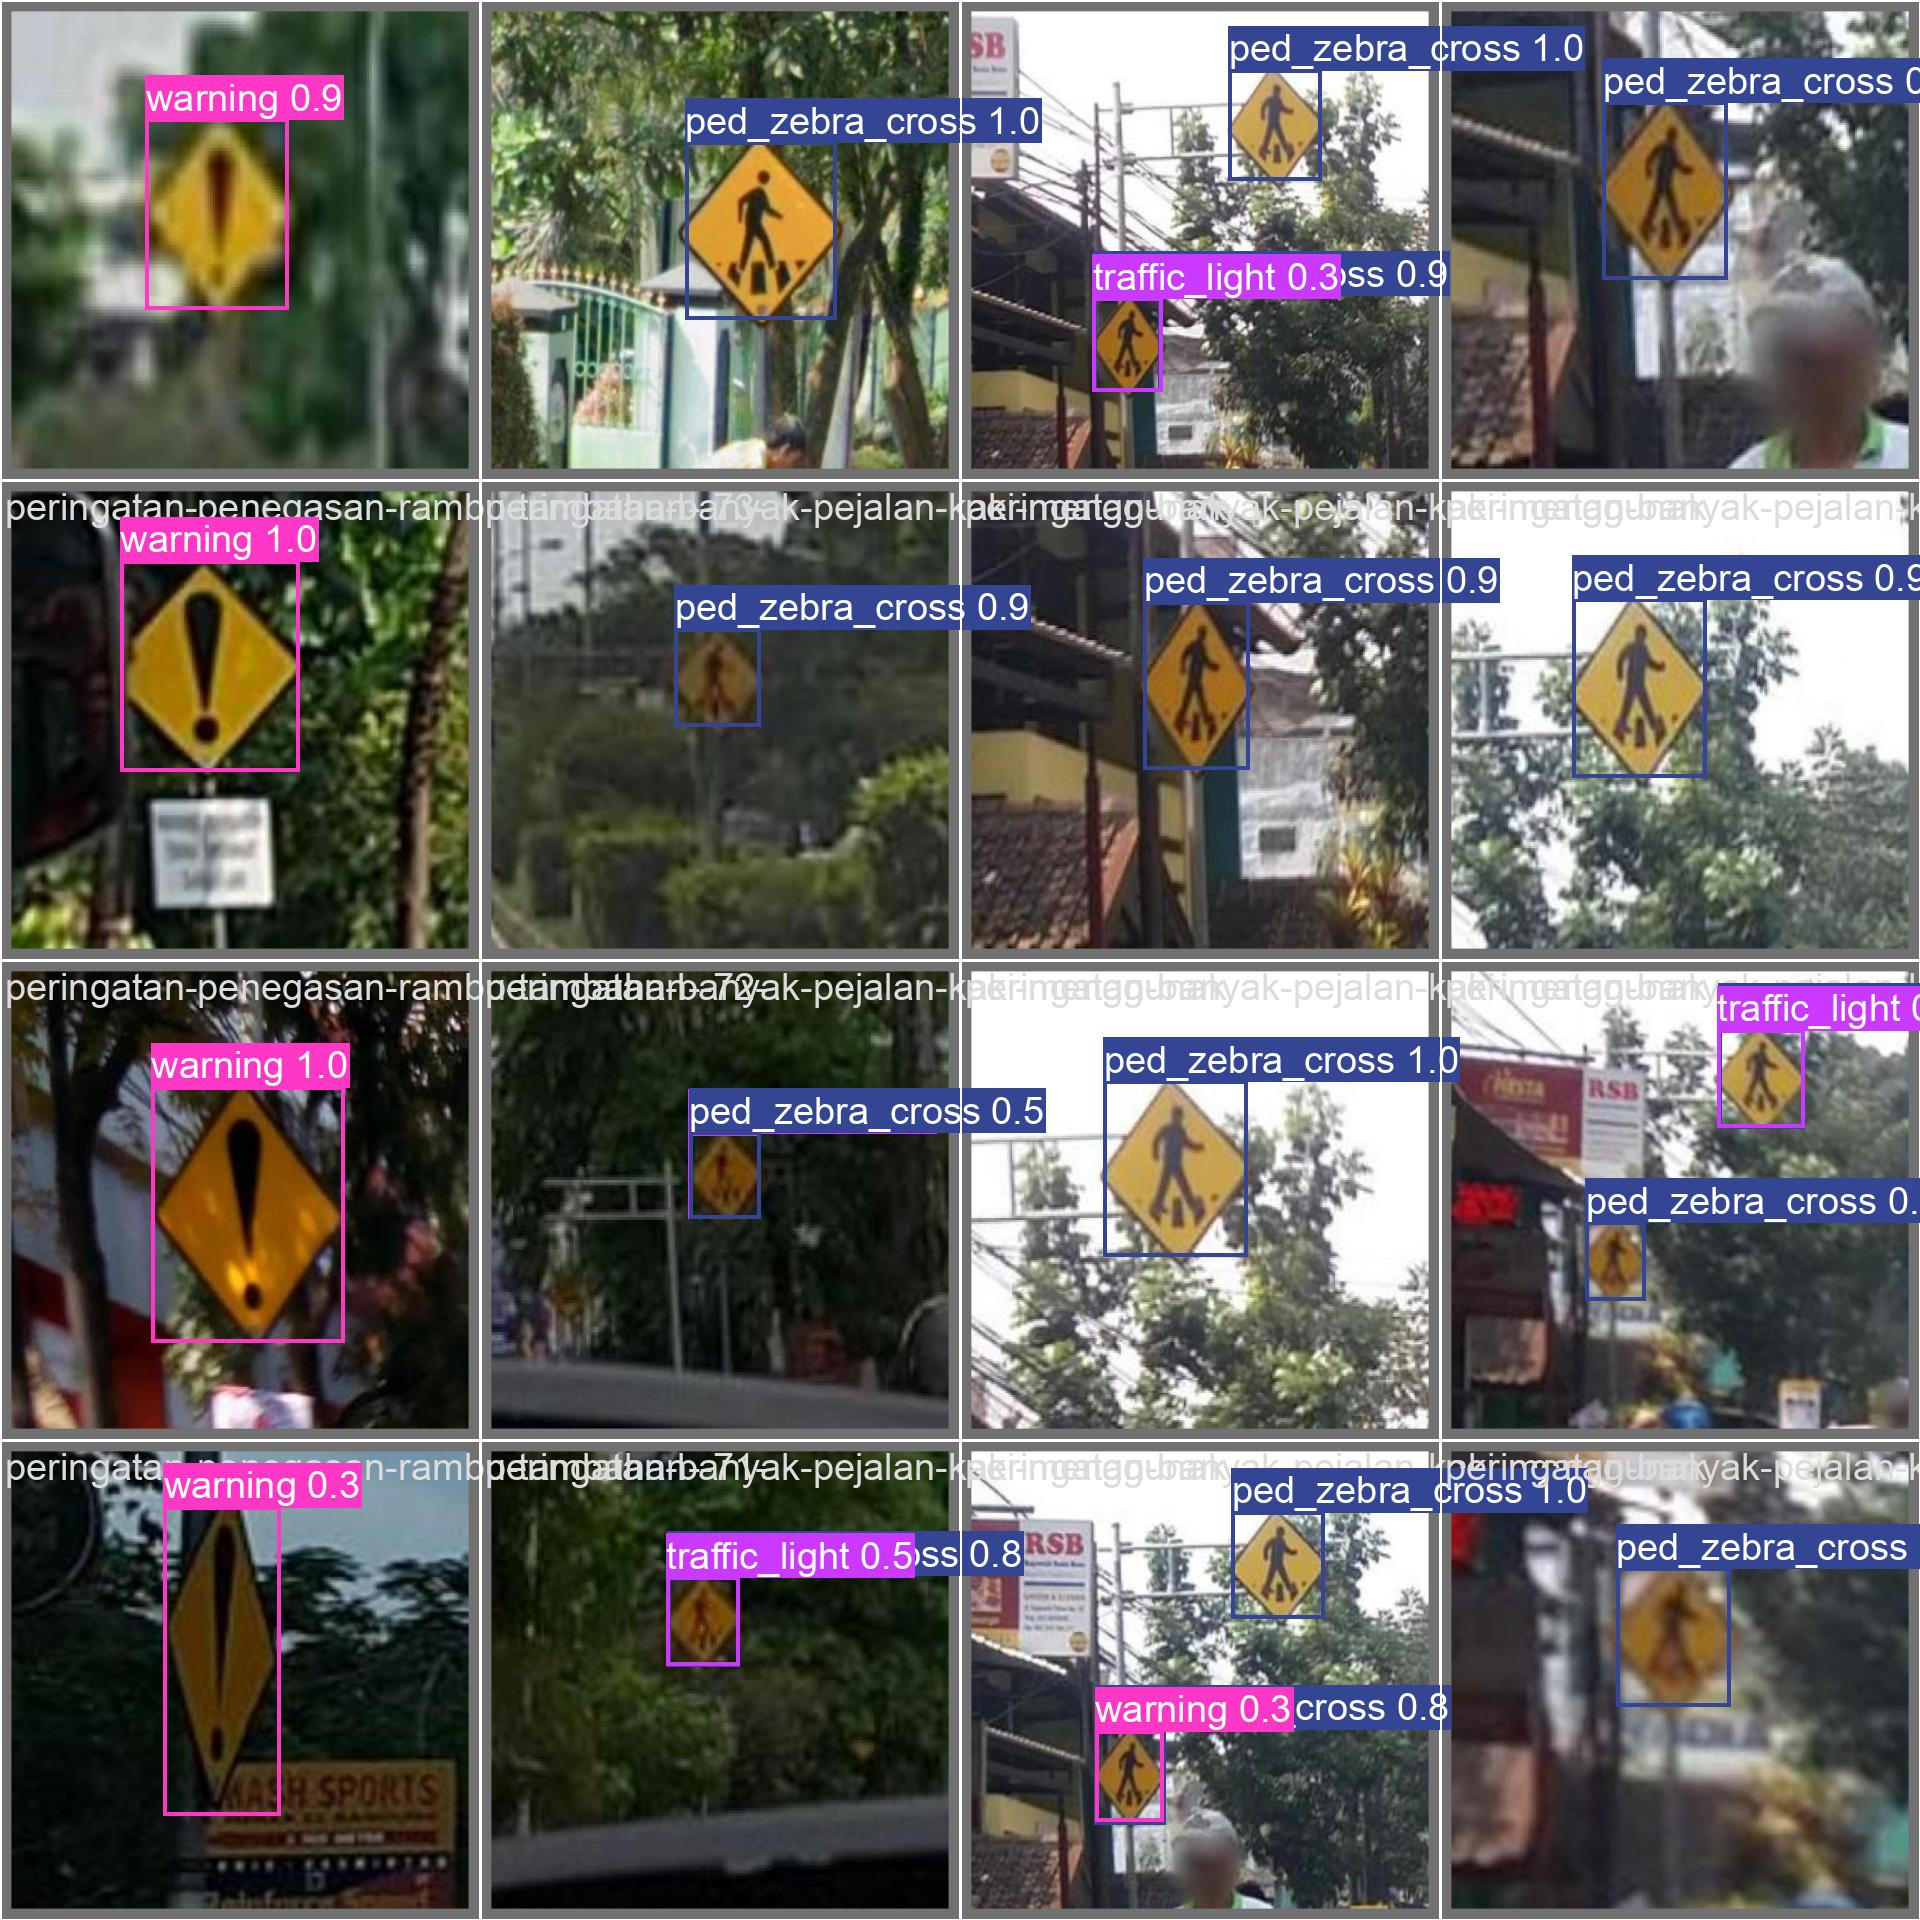

In [ ]:
Image(filename=f'/content/runs/detect/train4/val_batch1_pred.jpg')

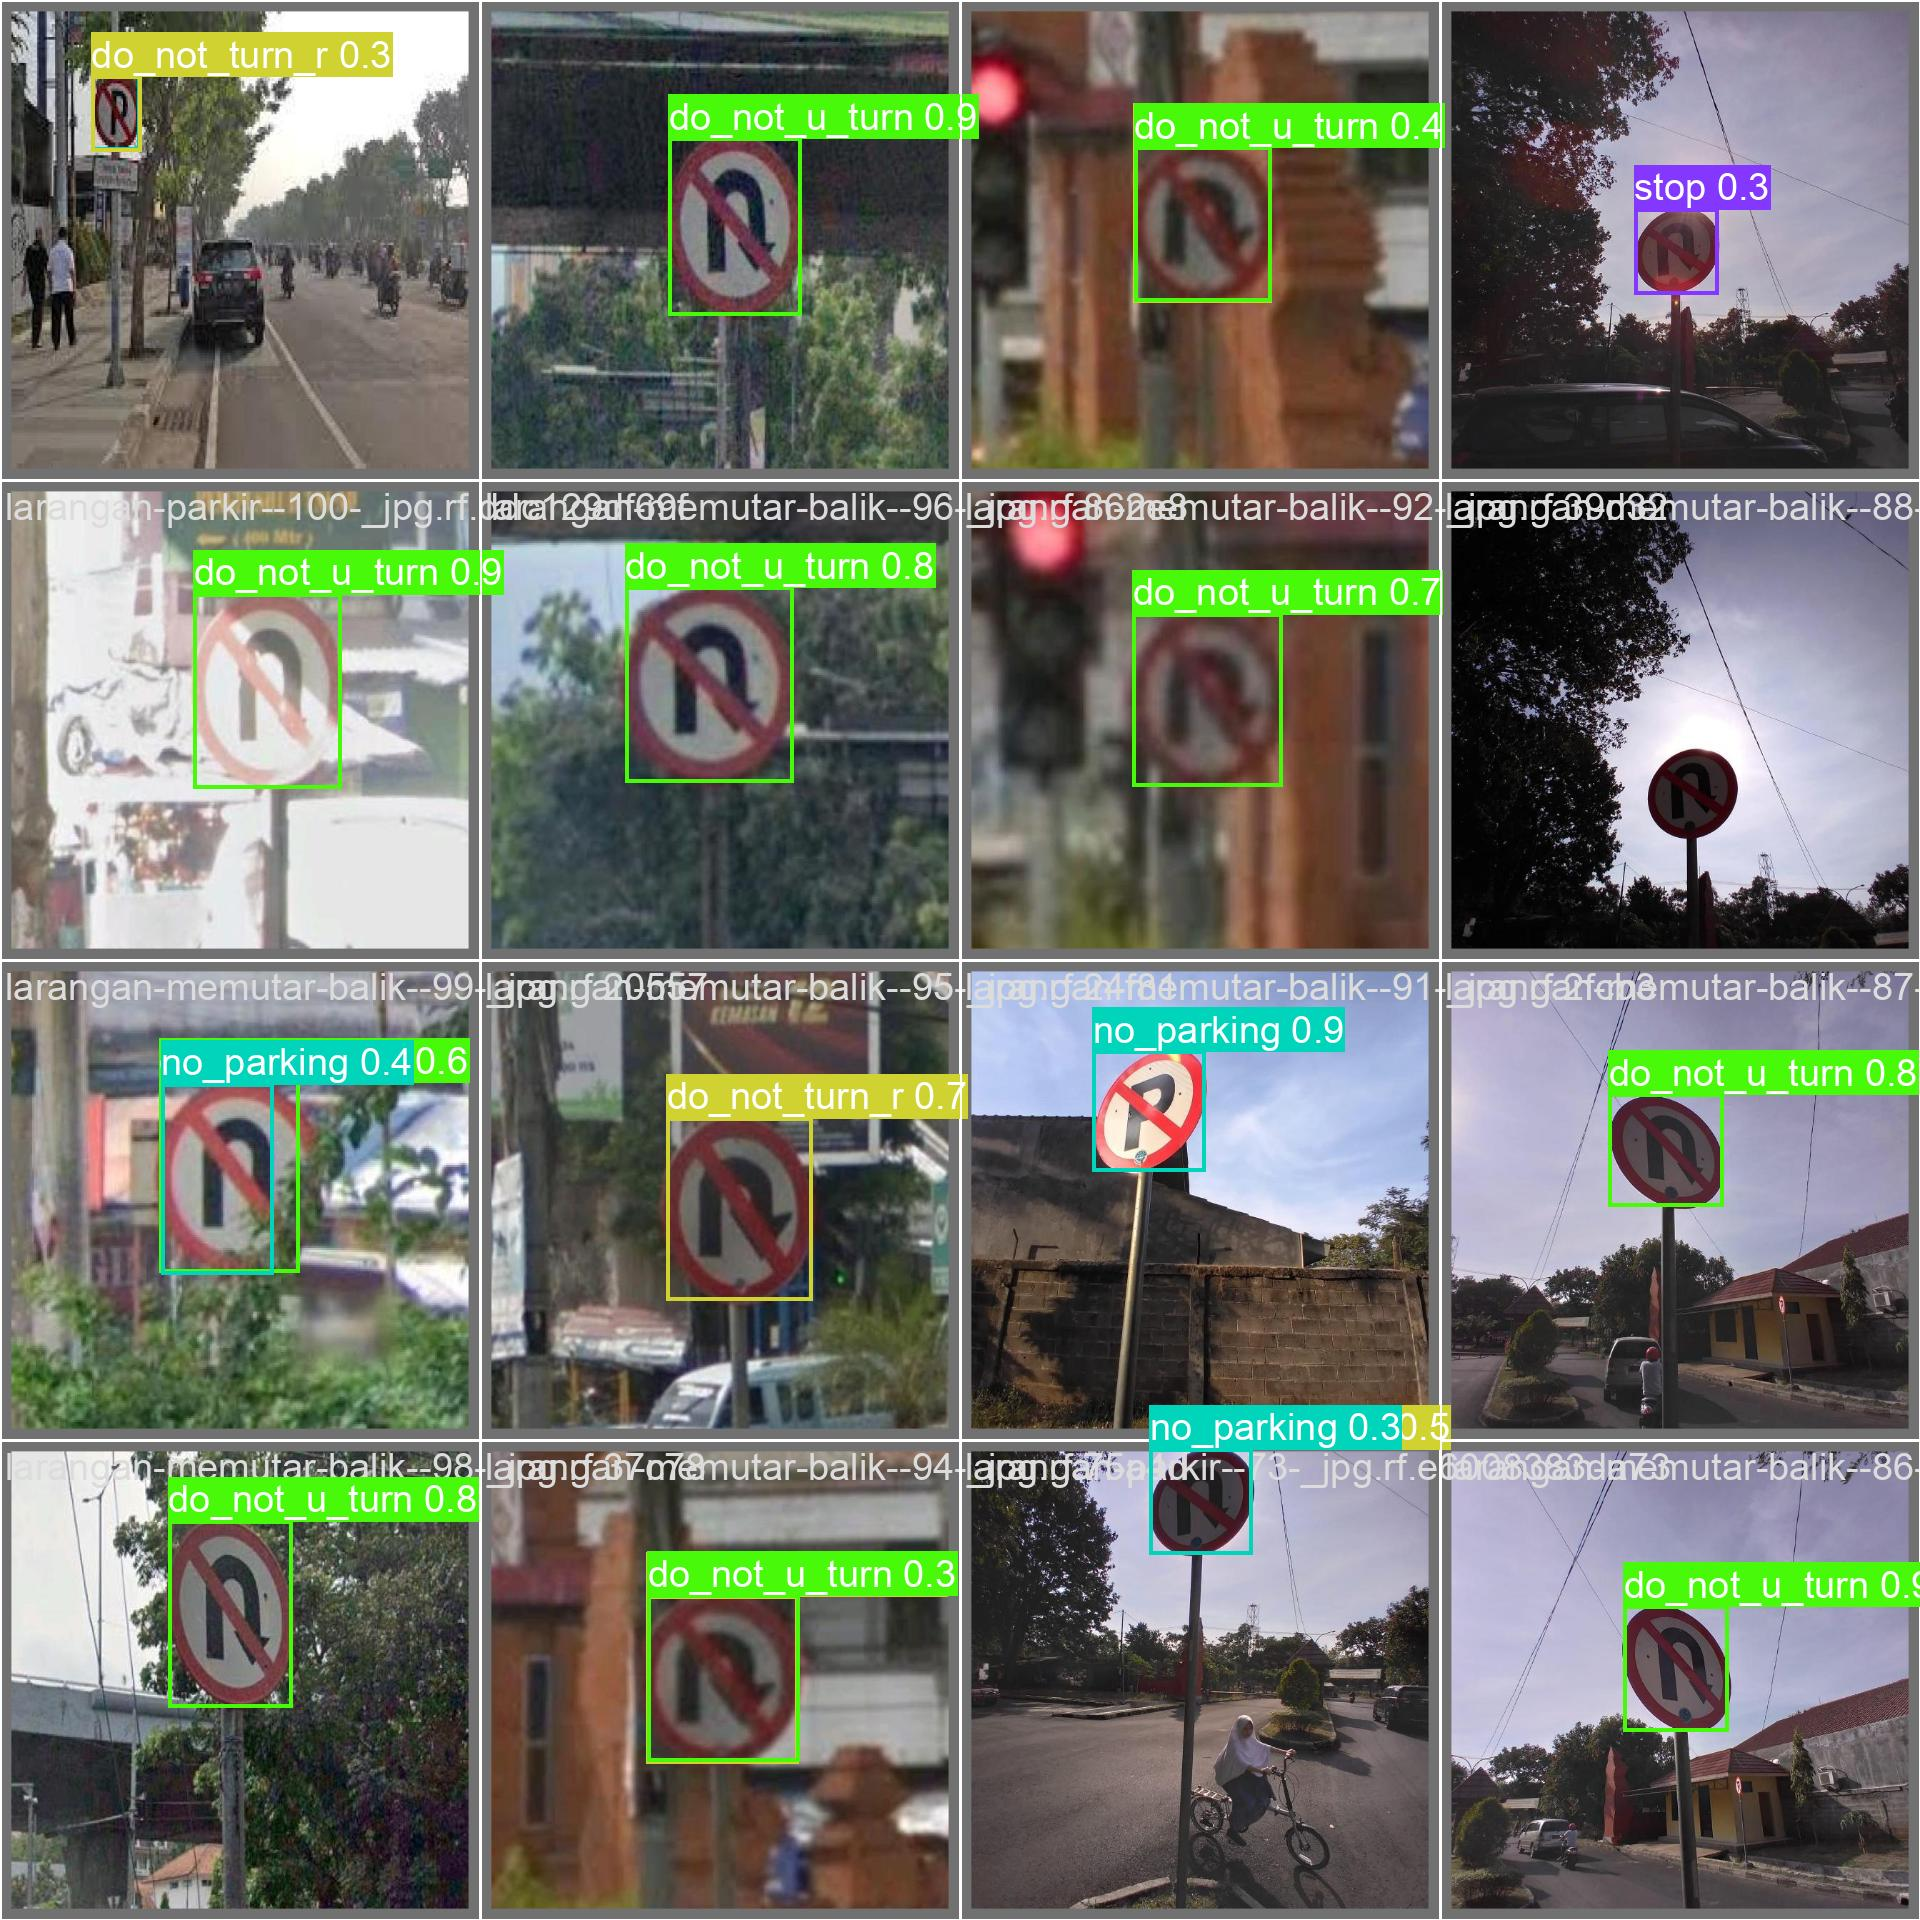

In [ ]:
Image(filename=f'/content/runs/detect/train4/val_batch2_pred.jpg')

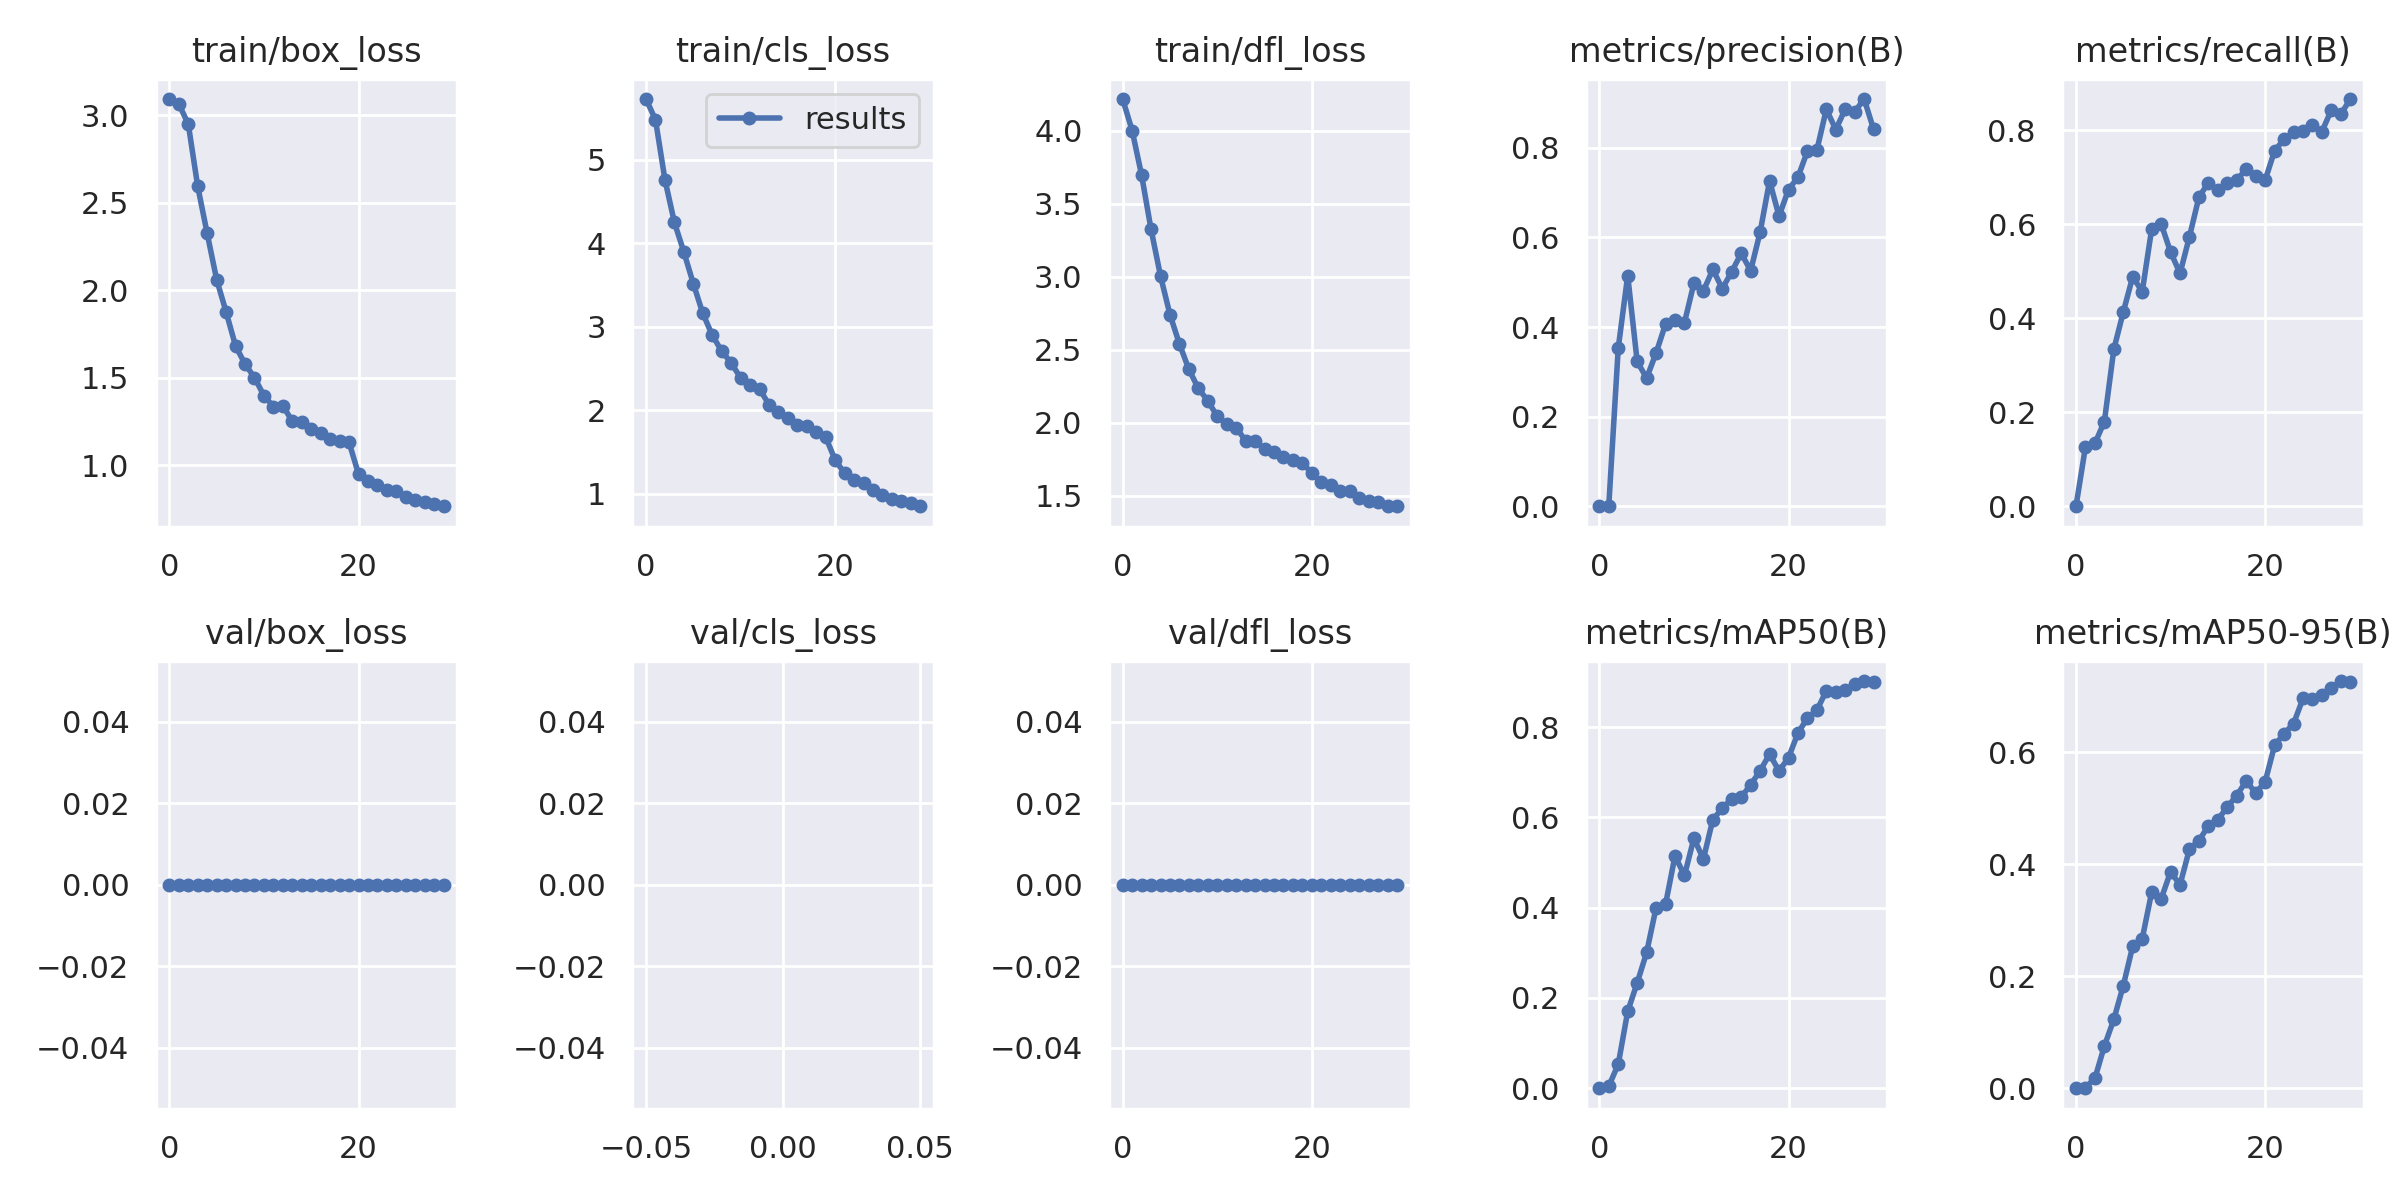

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png')

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train4/weights/best.pt" data="/content/datasets/road_signs/data.yaml"

2024-08-30 10:15:13.375635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 10:15:13.396587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 10:15:13.403001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 10:15:13.419134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-30 10:15:14.669603: W tensorflow/compiler/tf2

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train4/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/Project/Smart_Vehicle_Monitoring_System/Video_Dataset/vehicles-9.mp4"

2024-08-30 10:55:31.926850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 10:55:31.946930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 10:55:31.953679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 10:55:31.969083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-30 10:55:33.362449: W tensorflow/compiler/tf2

In [ ]:
output = "/content/runs/detect/predict6/vehicles-9.mp4"
drive_output = "/content/drive/MyDrive/SMART.V/Smart_Vehicle_Monitoring_System/Video_Dataset/Output/Traffic Signal/vehicles-9-result.mp4"

In [ ]:
import shutil
shutil.copy(output, drive_output)

'/content/drive/MyDrive/Project/Smart_Vehicle_Monitoring_System/Video_Dataset/Output/Traffic Signal/vehicles-9-result.mp4'